In [1]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import pysam
from collections import defaultdict

lengths=[]
mapping_lengths=[]

c=0
with pysam.AlignmentFile(f"/home/jack/code/recombinant_population_analysis/results/alignments/P2_7.bam", "rb") as bam:
    for read in bam.fetch():
        if not(read.is_secondary) and not(read.is_supplementary):
            c+=1
            lengths.append(read.infer_read_length())
            '''
            infer read length from CIGAR alignment.
            This method deduces the read length from the CIGAR alignment including hard-clipped bases.
            Returns None if CIGAR alignment is not present. 
            '''
            mapping_lengths.append(read.query_alignment_length)
            '''
            
            '''
print(c)


241861


In [2]:
mean_length=np.mean(lengths)

mean_length 

4332.697830572106

(0.0, 10000.0)

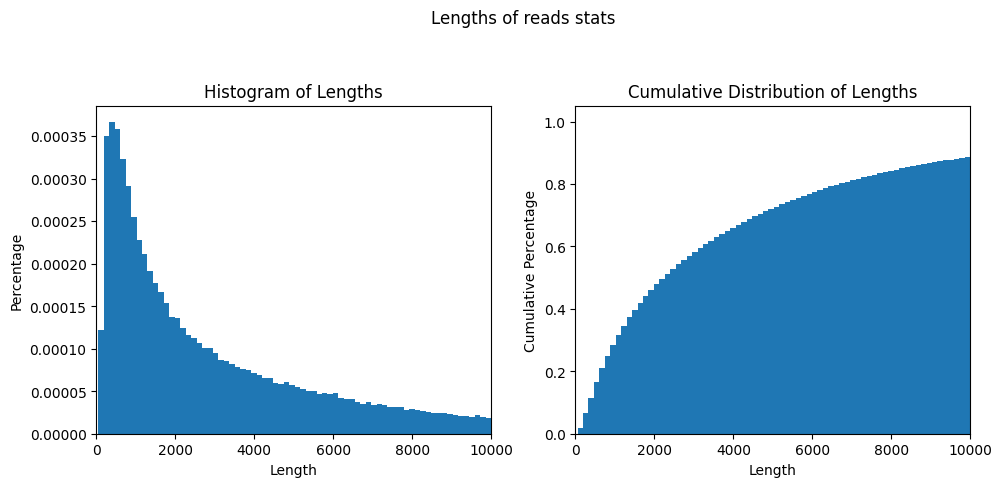

In [3]:
length, (density, cumulative) = plt.subplots(1, 2, figsize=(10, 5))

length.suptitle("Lengths of reads stats")
length.tight_layout(pad=3.0)

density.hist(lengths, bins=1000, density=True)
density.set_xlabel('Length')
density.set_ylabel('Percentage')
density.set_title('Histogram of Lengths')
density.set_xlim(0, 10000)

cumulative.hist(lengths, bins=1000, density=True, cumulative=True)
cumulative.set_xlabel('Length')
cumulative.set_ylabel('Cumulative Percentage')
cumulative.set_title('Cumulative Distribution of Lengths')
cumulative.set_xlim(0, 10000)



(0.0, 10000.0)

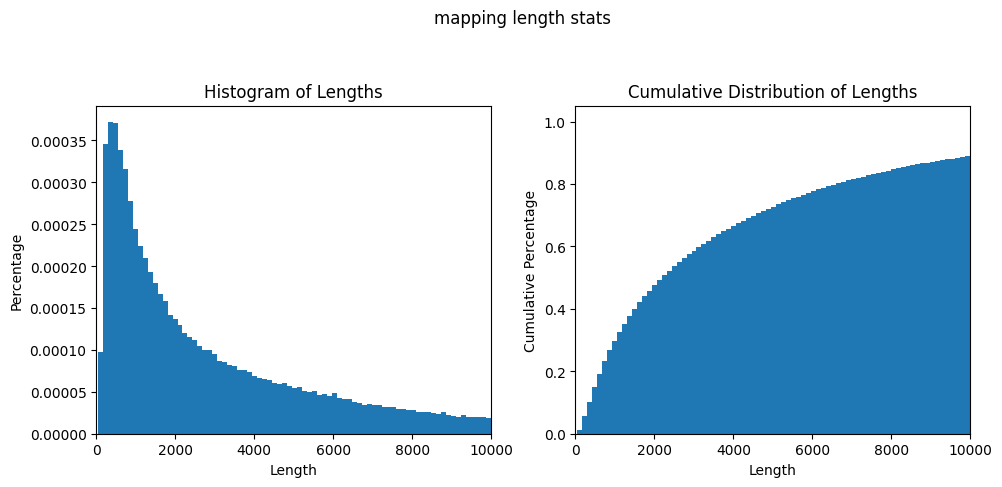

In [4]:
mapping_length, (density, cumulative) = plt.subplots(1, 2, figsize=(10, 5))

mapping_length.suptitle("mapping length stats")
mapping_length.tight_layout(pad=3.0)

density.hist(mapping_lengths, bins=1000, density=True)
density.set_xlabel('Length')
density.set_ylabel('Percentage')
density.set_title('Histogram of Lengths')
density.set_xlim(0, 10000)

cumulative.hist(mapping_lengths, bins=1000, density=True, cumulative=True)
cumulative.set_xlabel('Length')
cumulative.set_ylabel('Cumulative Percentage')
cumulative.set_title('Cumulative Distribution of Lengths')
cumulative.set_xlim(0, 10000)

(0.0, 40000.0)

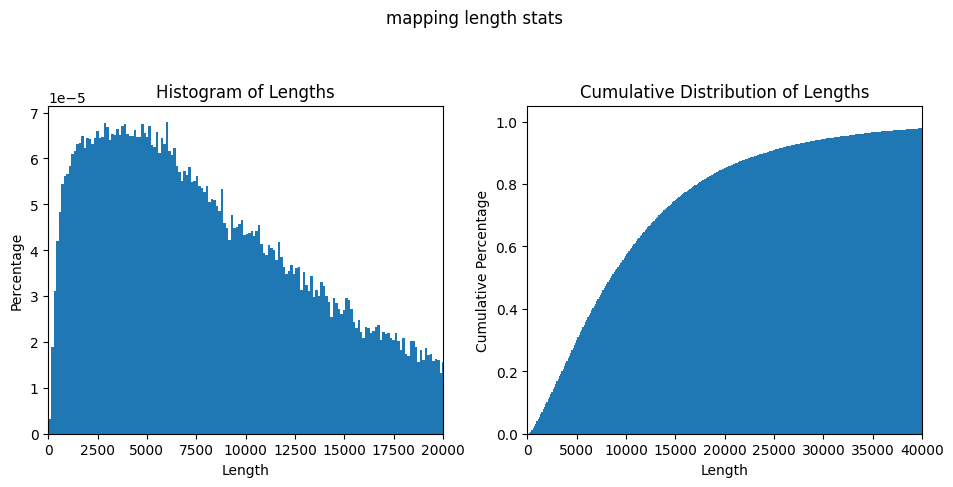

In [5]:
mapping_length, (density, cumulative) = plt.subplots(1, 2, figsize=(10, 5))

mapping_length.suptitle("mapping length stats")
mapping_length.tight_layout(pad=3.0)

density.hist(mapping_lengths, bins=1000, density=True, weights=mapping_lengths)
density.set_xlabel('Length')
density.set_ylabel('Percentage')
density.set_title('Histogram of Lengths')
density.set_xlim(0, 20000)

cumulative.hist(mapping_lengths, bins=1000, density=True, cumulative=True, weights=mapping_lengths)
cumulative.set_xlabel('Length')
cumulative.set_ylabel('Cumulative Percentage')
cumulative.set_title('Cumulative Distribution of Lengths')
cumulative.set_xlim(0, 40000)